In [ ]:
import pandas as pd
import os
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')

In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
#1
species_num=len(df.species.unique())
print("El número de especies distintas es", species_num)

El número de especies distintas es 3


In [ ]:
#2
df_Adelie=df[df["species"]=="Adelie"] #df solo con la especie Adelie
bill_l_Adelie=df_Adelie['bill_length_mm']
print("La media de la longitud de los picos de la especie Adelie es:",bill_l_Adelie.mean(), "mm")

La media de la longitud de los picos de la especie Adelie es: 38.79139072847682 mm


In [ ]:
#3
df_Gentoo=df[df["species"]=="Gentoo"]
body_mass_Gentoo=df_Gentoo["body_mass_g"]

print("La media de la masa corporal de la especie Gentoo es:", body_mass_Gentoo.mean(), "gramos")

La media de la masa corporal de la especie Gentoo es: 5076.016260162602 gramos


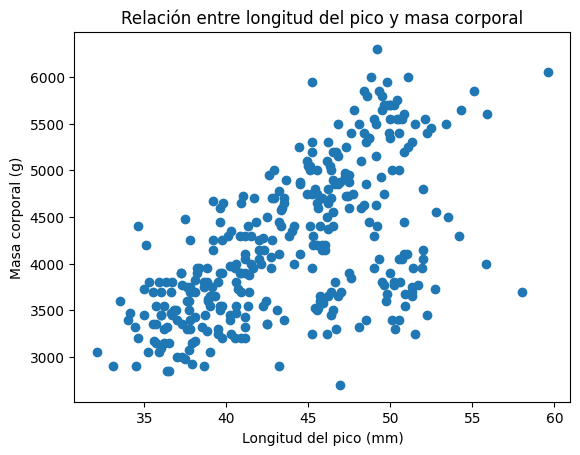

array([[1.        , 0.59510982],
       [0.59510982, 1.        ]])

In [ ]:
#4
bill_length = df["bill_length_mm"]
body_mass = df["body_mass_g"]

bill_length.dropna(axis=0, inplace=True, ignore_index=True)
body_mass.dropna(axis=0, inplace=True, ignore_index=True)

plt.scatter(bill_length, body_mass)
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.title("Relación entre longitud del pico y masa corporal")
plt.show()

np.corrcoef(bill_length, body_mass)

In [ ]:
print("El coeficiente de correlación es:", np.corrcoef(bill_length, body_mass)[0, 1])

El coeficiente de correlación es: 0.5951098244376303


Existe una correlación positiva entre la longitud del pico y la masa corporal. Sin embargo, al no ser lo suficientemente cercano a 1 esa correlación puede no ser tan significativa. Además, no implica causalidad, es decir, dicha correlación no significa que una variable cause cambios en la otra.

In [ ]:
#5. Para saber cuál es la isla con mayor número de pinguinos debo de alguna manera seleccionar la columna island y contar(sumar) el número de veces(filas) que aparece la isla Torgersen, Biscoe y Dream
#Antes que nada debo saber cuáles son las distintas islas que hay y después cuántas veces aparece cada una de ellas

print("Las islas que hay son", [df.island.unique()[i] for i in range(len(df.island.unique()))])
print()
print(df.island.value_counts())   #value_counts() cuenta cuántas veces aparece cada objeto en la columna

isla_maxima=df.island.value_counts().idxmax() #idxmax() devuelve el índice del valor máximo de la columna
print()

print("La isla con mayor número de pinguinos es", isla_maxima)


#Otra forma

#valores={} #creo un diccionario vacío

#for i in range(len(df.island.unique())):
#  tabla=df["island"]==df.island.unique()[i] #tabla de valores de verdad para la isla i. Aparecerá True en la tabla si en ese lugar está escrita la especie i
#  suma=tabla.sum() #sumará la cantidad de True's en la columna
#  valores[df.island.unique()[i]]=suma #agregara esa suma a la lista de suma

#print("La isla con mayor número de pinguinos es", max(valores, key=valores.get))


Las islas que hay son ['Torgersen', 'Biscoe', 'Dream']

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

La isla con mayor número de pinguinos es Biscoe


In [ ]:
#6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

df.species.unique()

df_Chinstrap=df[df["species"]=="Chinstrap"] #Definimos una tabla que contiene sólo las filas que corresponden a la especie Chinstrap

desviacion_aleta_Chins = df_Chinstrap.flipper_length_mm.std() #Calculamos la desviación estándar de la columna flipper_length_mm

print("La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es de:", f"{desviacion_aleta_Chins: .2f}", "mm")

#otra forma
#df_Chinstrap["flipper_length_mm"].std()

La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es de:  7.13 mm


In [ ]:
#7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

pico_max=df.bill_length_mm.max() #devuelve el valor máximo de la columna bill_length_mm

indice=df.bill_length_mm.idxmax() #devuelve el índice del valor máximo de la columna
fila=df.loc[indice] #devuelve la fila del índice
especie=df.loc[indice].species #devuelve la especie del índice

print(f"El pingüino con el pico más largo está en la posición {indice} con una medida de {pico_max}mm y es de la especie {especie}.")

El pingüino con el pico más largo está en la posición 253 con una medida de 59.6mm y es de la especie Gentoo.


In [ ]:
#8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

df_Adelie=df[df.species=="Adelie"] #tabla solo con la especie Adelie

#df_Adelie.sex.value_counts() #cuenta cuántas veces aparece cada objeto en la columna y los devuelve en una tablita (una serie)

sex_proportions = df_Adelie.sex.value_counts(normalize=True) #El argumento normalize=True en la función value_counts() calcula las proporciones de cada valor único en una columna en lugar de sus recuentos.

print(f"La proporción de machos y hembras de la especie adelie es \n{sex_proportions}")

print(f"El porcentaje de machos en la especie Adelie es de {sex_proportions.Male*100: .2f}%.")
print(f"El porcentaje de hembras en la especie Adelie es de {sex_proportions.Female*100: .2f}%.")

La proporción de machos y hembras de la especie adelie es 
sex
Male      0.5
Female    0.5
Name: proportion, dtype: float64
El porcentaje de machos en la especie Adelie es de  50.00%.
El porcentaje de hembras en la especie Adelie es de  50.00%.


In [ ]:
#9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?
# Ver punto 4.

Existe una correlación positiva entre la longitud del pico y la masa corporal. Sin embargo, al no ser lo suficientemente cercano a 1 esa correlación puede no ser tan significativa. Además, no implica causalidad, es decir, dicha correlación no significa que una variable cause cambios en la otra.

In [ ]:
#10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

In [ ]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [ ]:
df.info()

#bill_length.isna()
#body_mass[body_mass.isna().any()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#Método de remover null
#drop na 0 for index 1 for columns
df.dropna(axis=0, inplace=True, ignore_index=True)
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB
